Loading pre-trained word vectors...


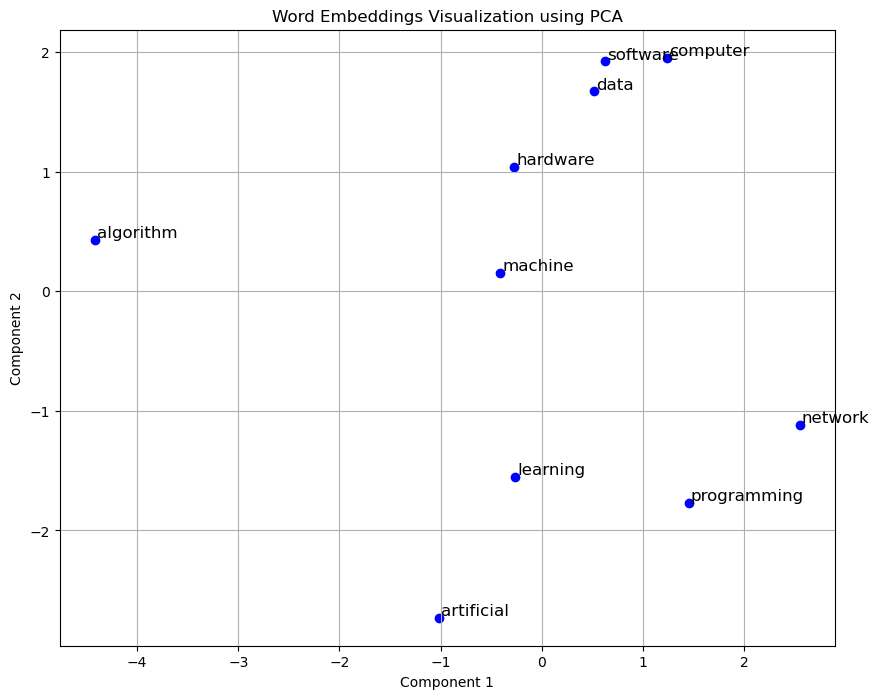

C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shrey\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Shrey\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

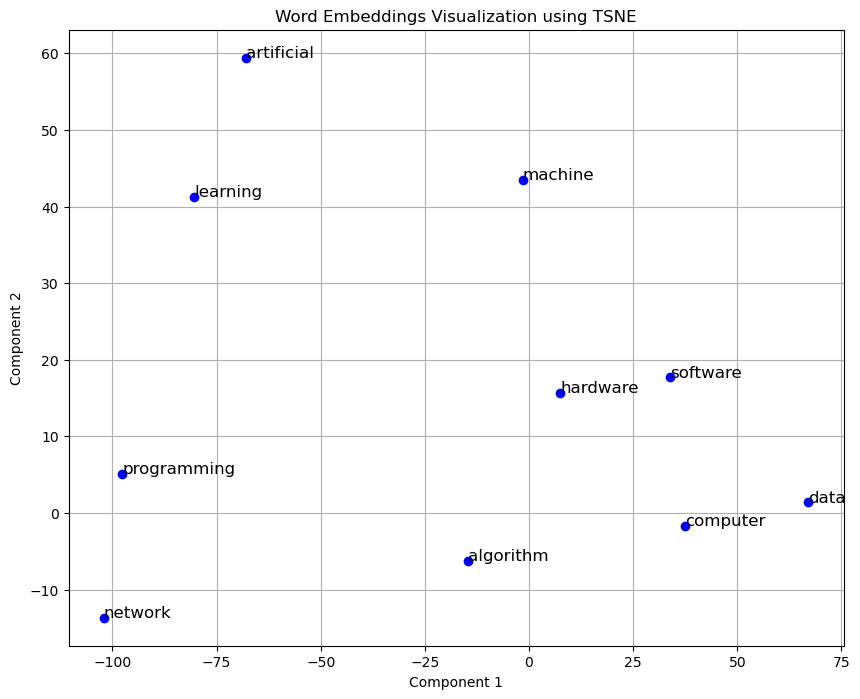


Top 5 semantically similar words to 'computer':
computers (0.9165)
software (0.8815)
technology (0.8526)
electronic (0.8126)
internet (0.8060)

Top 5 semantically similar words to 'learning':
teaching (0.8757)
skills (0.8351)
experience (0.8201)
practical (0.8190)
knowledge (0.8090)


In [2]:
# Install required libraries
!pip install gensim scikit-learn matplotlib

# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("glove-wiki-gigaword-50")  # Load Word2Vec model

# Select 10 words from a specific domain (e.g., technology)
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network", "programming", "machine", "learning", "artificial"]

# Get vectors for the selected words
domain_vectors = np.array([word_vectors[word] for word in domain_words])

# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method='pca', perplexity=5):
    # Reduce dimensionality to 2D
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    # Fit and transform the vectors
    reduced_vectors = reducer.fit_transform(vectors)

    # Plot the results
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# [8] - Visualize using PCA
visualize_word_embeddings(domain_words, domain_vectors, method='pca')

# [9] - Visualize using t-SNE
visualize_word_embeddings(domain_words, domain_vectors, method='tsne', perplexity=3)

# [10] - Function to generate 5 semantically similar words
def generate_similar_words(word):
    try:
        similar_words = word_vectors.most_similar(word, topn=5)
        print(f"\nTop 5 semantically similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word} ({similarity:.4f})")

    except KeyError as e:
        print(f"\nError: {e} not found in the vocabulary.")

# [11] - Example: Generate similar words for a given input
generate_similar_words("computer")
generate_similar_words("learning")